In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set(style="white")

gs_df = pd.read_csv('EDA_Gold_Silver_prices.csv')

print(gs_df.shape)

(241, 3)


In [2]:
gs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
Month          241 non-null object
SilverPrice    241 non-null float64
GoldPrice      241 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.7+ KB


In [3]:
gs_df.tail()

,Month,SilverPrice,GoldPrice
236,Nov-16,1175.45,83622.54
237,Dec-16,1115.72,78583.48
238,Jan-17,1151.15,81191.05
239,Feb-17,1203.35,82818.17
240,Mar-17,1162.15,81169.45


In [4]:
print(dt.date.today())

2018-10-25


In [5]:
# What is the correlation in Gold and Silver prices (round off the answer to two decimal places)?
# Also, enter a fraction, not a percentage (e.g. 0.34, not 34.00%).

gs_df['GoldPrice'].corr(gs_df['SilverPrice'])

0.9542559570539775

In [6]:
# What is the correlation in Gold and Silver prices for the years 2008(nearest two decimal places )?

d = dt.datetime.strptime('Jan-17', '%b-%y')
d.strftime('%b ,%Y')
#gs_df['Month'].map(lambda x : dt.datetime.strftime(x, '%b-%y'))
gs_df['month'] = gs_df['Month'].apply(lambda x : x.split('-')[0])
gs_df['year'] = gs_df['Month'].apply(lambda x : (int)("19"+x.split('-')[1]) if (int)(x.split('-')[1]) > 90 else (int)("20"+x.split('-')[1]))

gs_df.head()
gs_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 5 columns):
Month          241 non-null object
SilverPrice    241 non-null float64
GoldPrice      241 non-null float64
month          241 non-null object
year           241 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.5+ KB


In [7]:
gs_df_2008=gs_df[gs_df['year'] == 2008]
gs_df_2008['GoldPrice'].corr(gs_df_2008['SilverPrice'])

0.009583757463369392

<Figure size 1440x1152 with 0 Axes>

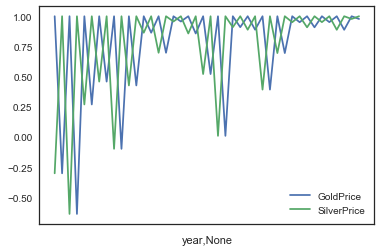

In [20]:
plt.figure(figsize=(20, 16))
g_by = gs_df.groupby('year')
gs_df.groupby('year')[['GoldPrice','SilverPrice']].corr().plot()
#plt.scatter(y='GoldPrice', x='year', data=gs_df)
#plt.xlabel('Silver Price')
#plt.ylabel('Gold Price')
#plt.title("India Silver/Gold Price")